In [22]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [23]:
%%html
<body>
<h1><center>Frequency and Resonance Mode Analysis of a Cymbal</center></h1>
<p>We determine the cymbal’s frequency response by computing the Fourier transform of the impulse response.
The impulse response is created by striking the cymbal with a drumstick.
Here's an audio clip of the impulse response:</p>
<body>

In [24]:
#import necessary packages, write setup_graph function 
%matplotlib inline
import IPython
import scipy
import numpy
import math
import matplotlib.pyplot as plt
import scipy
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import interact, fixed
from traitlets import CInt, link
from IPython.core.display import HTML
#graphing helper
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

<IPython.core.display.Javascript object>


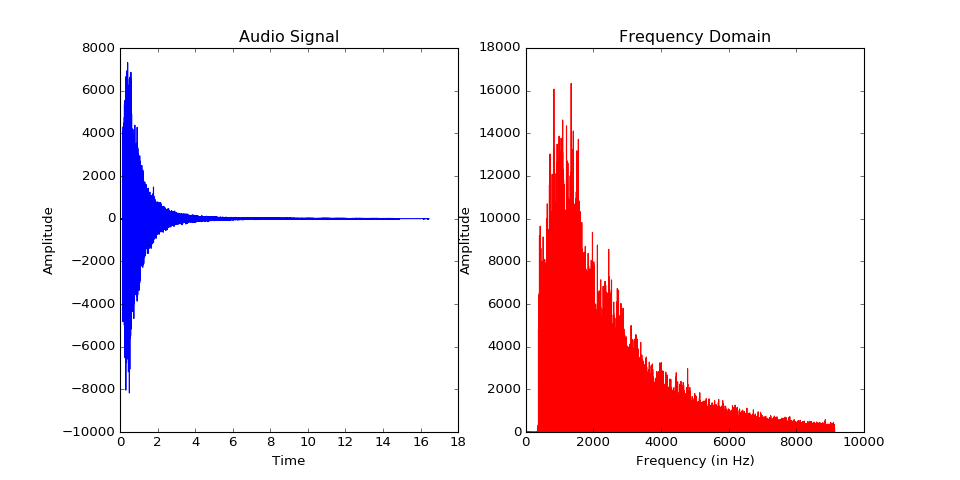

In [25]:
%matplotlib notebook
from scipy.io.wavfile import read,write
cymbal = IPython.display.Audio("Zildjian K Custom Clip.wav")
display(cymbal)
rate,data = read("Zildjian K Custom Clip.wav")

#calculations for length of clip, # of samples, y values
y=data[:,1]
lungime=len(y)
timp=len(y)/rate
t=numpy.linspace(0,timp,len(y))

#html explanation- text
display(HTML('<p>The impulse response and the frequency response are a Fourier transform pair.</p>'))

#create new figure for impulse response signal and FFT
figIm = plt.figure(figsize = (12,6))

#graph impulse response signal
plt1 = figIm.add_subplot(1,2,1)
plt1.set_title('Audio Signal')
plt1.set_xlabel('Time')
plt1.set_ylabel('Amplitude')
plt1.plot(t,y, 'b')

#create freq and magnitude arrays for fft
fftOutput2 = numpy.fft.rfft(data)
magnitudeOnly2 = [numpy.abs(i) for i in fftOutput2]
frequencies2 = [(i/lungime)*rate for i in range(int(lungime))]

#cut each array to filter out points above the cutoff index
cutoff = 150000 #cutoff index
magnitudeOnly2 = magnitudeOnly2[:cutoff] #cuts magnitude array- y axis
frequencies2 = frequencies2[:cutoff] #cuts freq array- x axis

#graph fft
plt2 = figIm.add_subplot(1,2,2)
plt2.set_title('Frequency Domain')
plt2.set_xlabel('Frequency (in Hz)')
plt2.set_ylabel('Amplitude')
plt2.plot(frequencies2, magnitudeOnly2, 'r')

In [26]:
%%html
<p>Now we can ask how the cymbal vibrates to create the sounds with the distinct frequencies observed in the frequency response.</p>
<p><b style="color:red">Question: </b><b>Can we visualize and model these vibrations?</b></p>
<p>This is a challenging question as the vibrations of musical instruments that lie at the origin of their sound can be rather complex.
<br>However, we can start out from the following:</p>

<p><b style="color:red">Hypothesis: </b>Given the <b>finite size of the cymbal</b>, vibrational resonances have to manifest themselves in <b>standing wave patterns</b>.</p>
<p><b>Virtual Experiment:</b> Choose an input frequency signal and observe the cymbal's response in the form of a standing wave pattern</p>

<IPython.core.display.Javascript object>


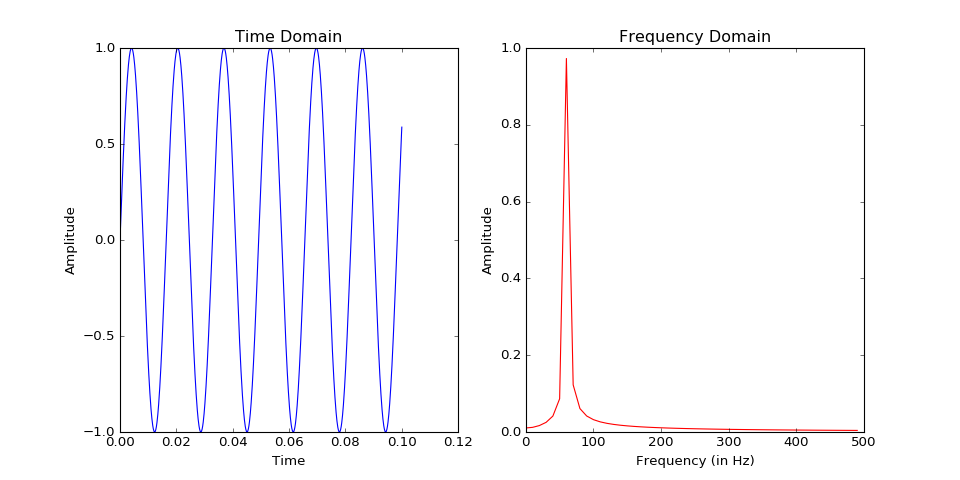

In [27]:
import io
import base64
from IPython.display import HTML
from IPython.display import YouTubeVideo
#list of frequencies with known output
freqs = (61,103,151,207,254,301)

#creates slider that chooses which frequency to display
index = widgets.IntSlider(description = "Choose a Frequency", value = 0, min = 0, max = 5, step = 1, readout = False)
display(index)

#displays frequency in text box
freqDisplay = widgets.IntText(description = "Frequency:", value = freqs[index.value])
display(freqDisplay)

#sets input signal values
freq = freqs[index.value]
amp = 1 #amplitude
time_to_plot = 0.1 # seconds
sample_rate = 10000 # samples per second
num_samples = sample_rate * time_to_plot

#create x and y arrays
t = numpy.linspace(0, time_to_plot, num_samples) #creates array for x axis: time values
signal = [amp * numpy.sin(freq * i * 2*numpy.pi) for i in t] # creates array for y values

#create figure for input signals
figIn = plt.figure(figsize = (12,6))

#plots signal
pltsig = figIn.add_subplot(1,2,1)
pltsig.set_title('Time Domain')
pltsig.set_xlabel('Time')
pltsig.set_ylabel('Amplitude')
line1, = pltsig.plot(t,signal,'b')#plots values

fftOutput = numpy.fft.rfft(signal)
magnitudeOnly = [math.sqrt(i.real**2 + i.imag**2)/len(fftOutput) for i in fftOutput]
frequencies = [(i/num_samples)*sample_rate for i in range(int(num_samples/2+1))]

cutoff1 = 50
magnitudeOnly = magnitudeOnly[:cutoff1]
frequencies = frequencies[:cutoff1]

#plots FFT
pltfft = figIn.add_subplot(1,2,2)
pltfft.set_title('Frequency Domain')
pltfft.set_xlabel('Frequency (in Hz)')
pltfft.set_ylabel('Amplitude')
line3, = pltfft.plot(frequencies, magnitudeOnly, 'r')#plots values

#displays video model of standing wave pattern
videos = ("FP0kd0sHq3w", "W8J7f1CeBIA", "NhAOMzK6J3A", "yAMnm7X0eAg", "o-wh7XEvE0U", "FhZCAQt0uaY")
video = YouTubeVideo(videos[index.value])
display(video)

#updates text box and signal whenever slider is moved
def updateFreq(self):
    
    #clears previous output
    #IPython.display.clear_output()
    
    #figIn.canvas.draw()
    #updates freq in text box
    freqDisplay.value = freqs[index.value]
    
    #update freq
    freq = freqs[index.value]

    #update y array
    signal = [amp * numpy.sin(freq * i * 2*numpy.pi) for i in t] # Explain the 2*pi
    
    #plots signal
    line1.set_ydata(signal)
    #update fft
    fftOutput = numpy.fft.rfft(signal)
    magnitudeOnly = [math.sqrt(i.real**2 + i.imag**2)/len(fftOutput) for i in fftOutput]
    frequencies = [(i/num_samples)*sample_rate for i in range(int(num_samples/2+1))]
    magnitudeOnly = magnitudeOnly[:cutoff1]
    frequencies = frequencies[:cutoff1]
    
    #plots FFT
    line3.set_ydata(frequencies)
    line3.set_ydata(magnitudeOnly)
    
    #displays video of standing wave pattern
    video = YouTubeVideo(videos[index.value])
    display(video)
index.observe(updateFreq)